In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()

In [4]:
data = pd.read_csv('./data/HeartDisease.csv')

In [5]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [7]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [8]:
data.rename(columns={"target":"NoHeartDisease"}, inplace = True)

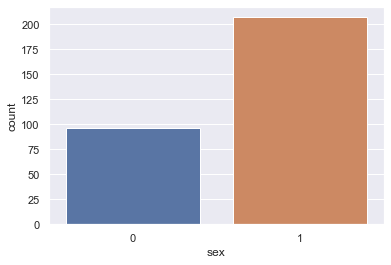

In [9]:
sns.countplot(x='sex', data=data) # 1=male, 0=female

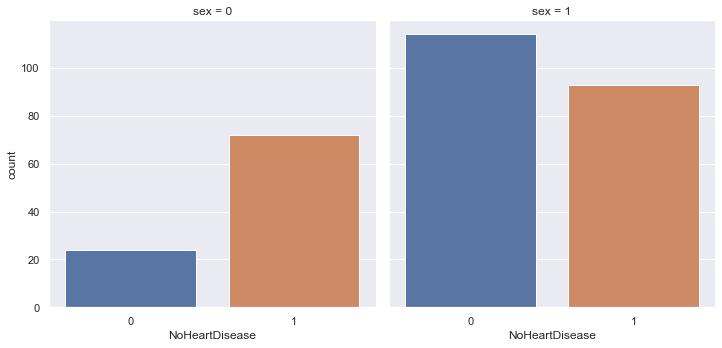

In [10]:
sns.catplot(x='NoHeartDisease',col='sex',kind='count',data=data) #Based on this dataset, men are more likely to get heart disease

In [15]:
data.groupby(['sex']).NoHeartDisease.sum()

sex
0    72
1    93
Name: NoHeartDisease, dtype: int64

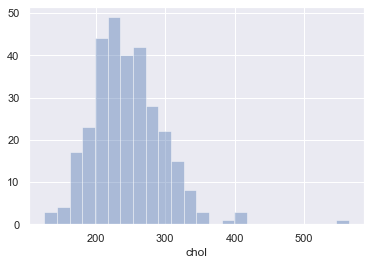

In [12]:
sns.distplot(data.chol, kde = False)

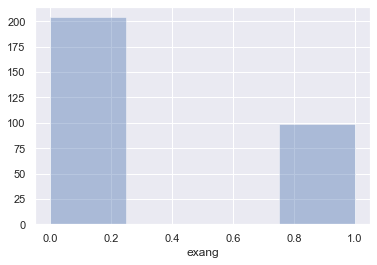

In [13]:
sns.distplot(data.exang, kde = False)

**Stripplot and Swarmplot for Cholestrol and Heart Disease**

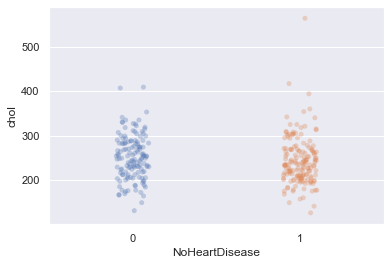

In [19]:
sns.stripplot(x='NoHeartDisease',y='chol', data=data, alpha=0.3, jitter=True)

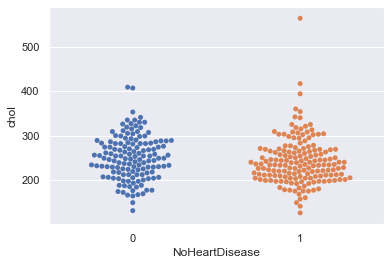

In [18]:
sns.swarmplot(x='NoHeartDisease', y='chol', data=data)

* Looking at the chart above, patients with higher cholesterol were more likely to have heart disease. 
* There are some outliers of people with very high cholesterol yet no heart disease

**Swarmplot for Resting Blood Pressure and Heart Disease**

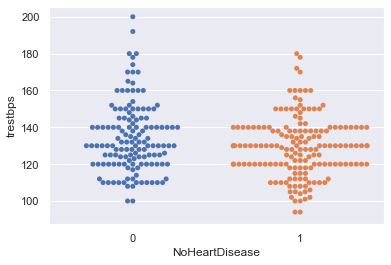

In [22]:
sns.swarmplot(x='NoHeartDisease', y='trestbps', data=data)

/usr/local/lib/python3.7/site-packages/seaborn/distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


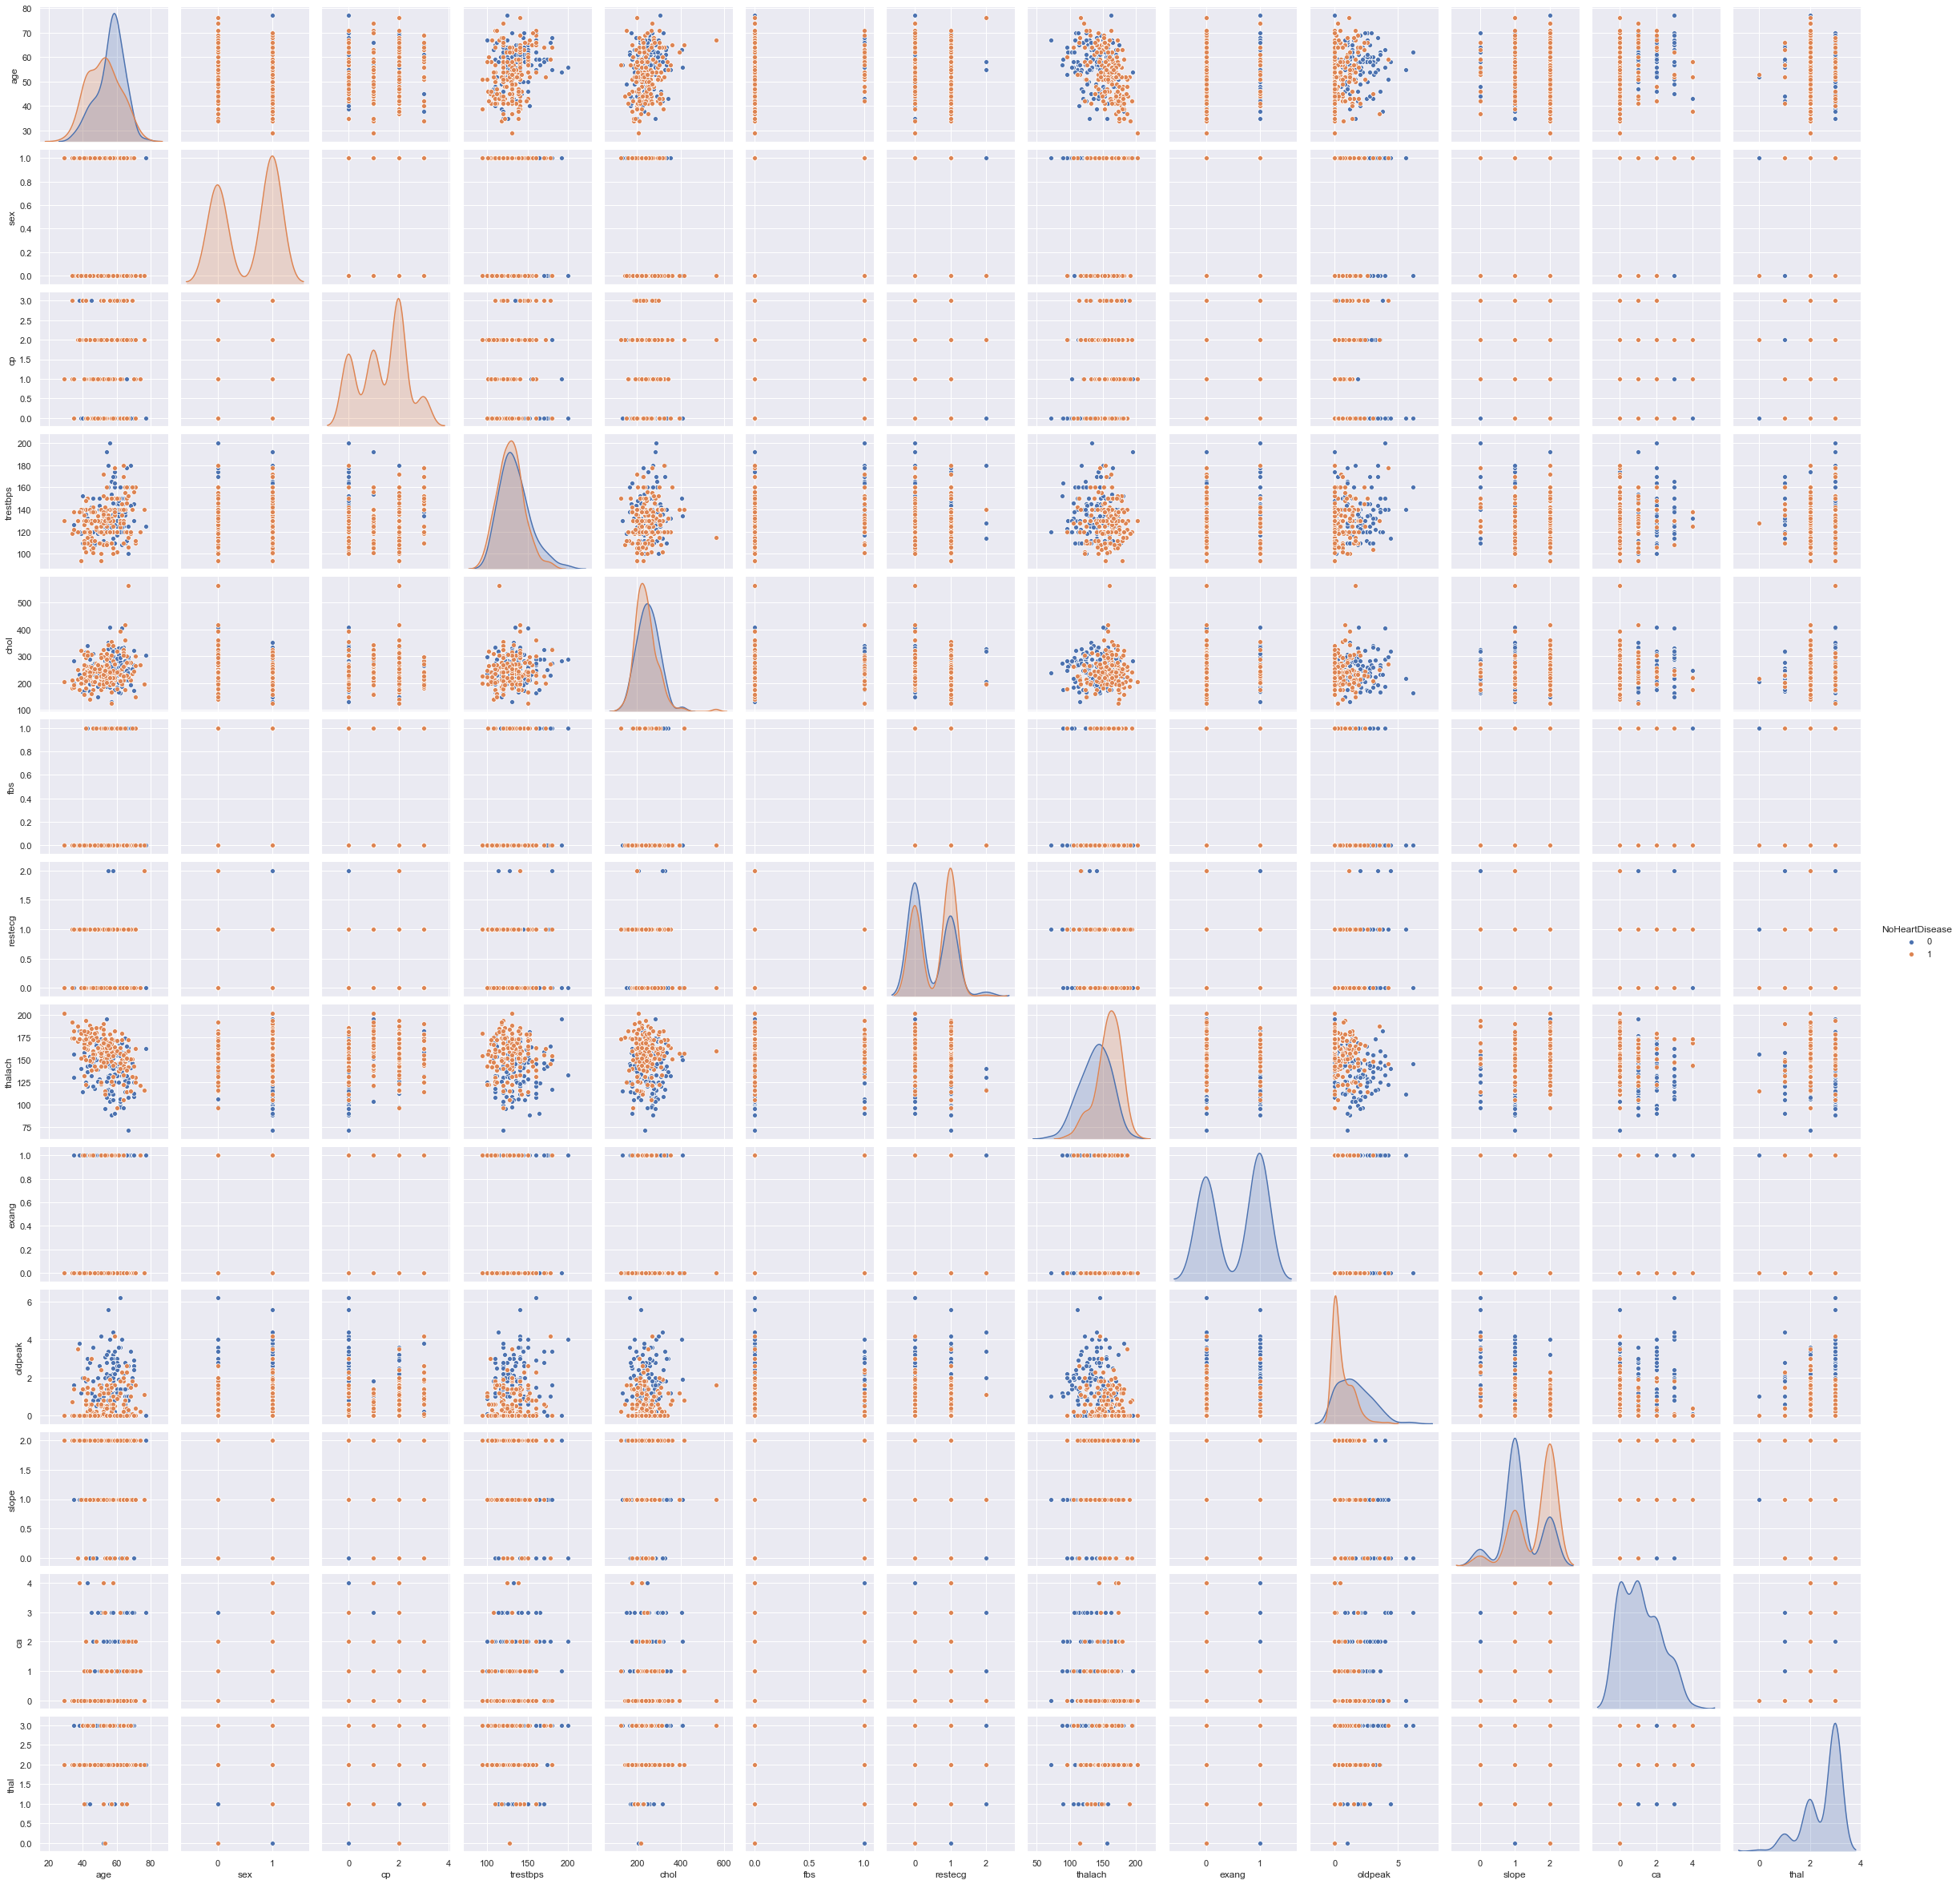

In [23]:
sns.pairplot(data, hue='NoHeartDisease')

* Try pairplot with fewer columns

In [26]:
data.iloc[:, [0,1,2,3,4,5,6,7,13]]


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,NoHeartDisease
0,63,1,3,145,233,1,0,150,1
1,37,1,2,130,250,0,1,187,1
2,41,0,1,130,204,0,0,172,1
3,56,1,1,120,236,0,1,178,1
4,57,0,0,120,354,0,1,163,1
...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,0
299,45,1,3,110,264,0,1,132,0
300,68,1,0,144,193,1,1,141,0
301,57,1,0,130,131,0,1,115,0


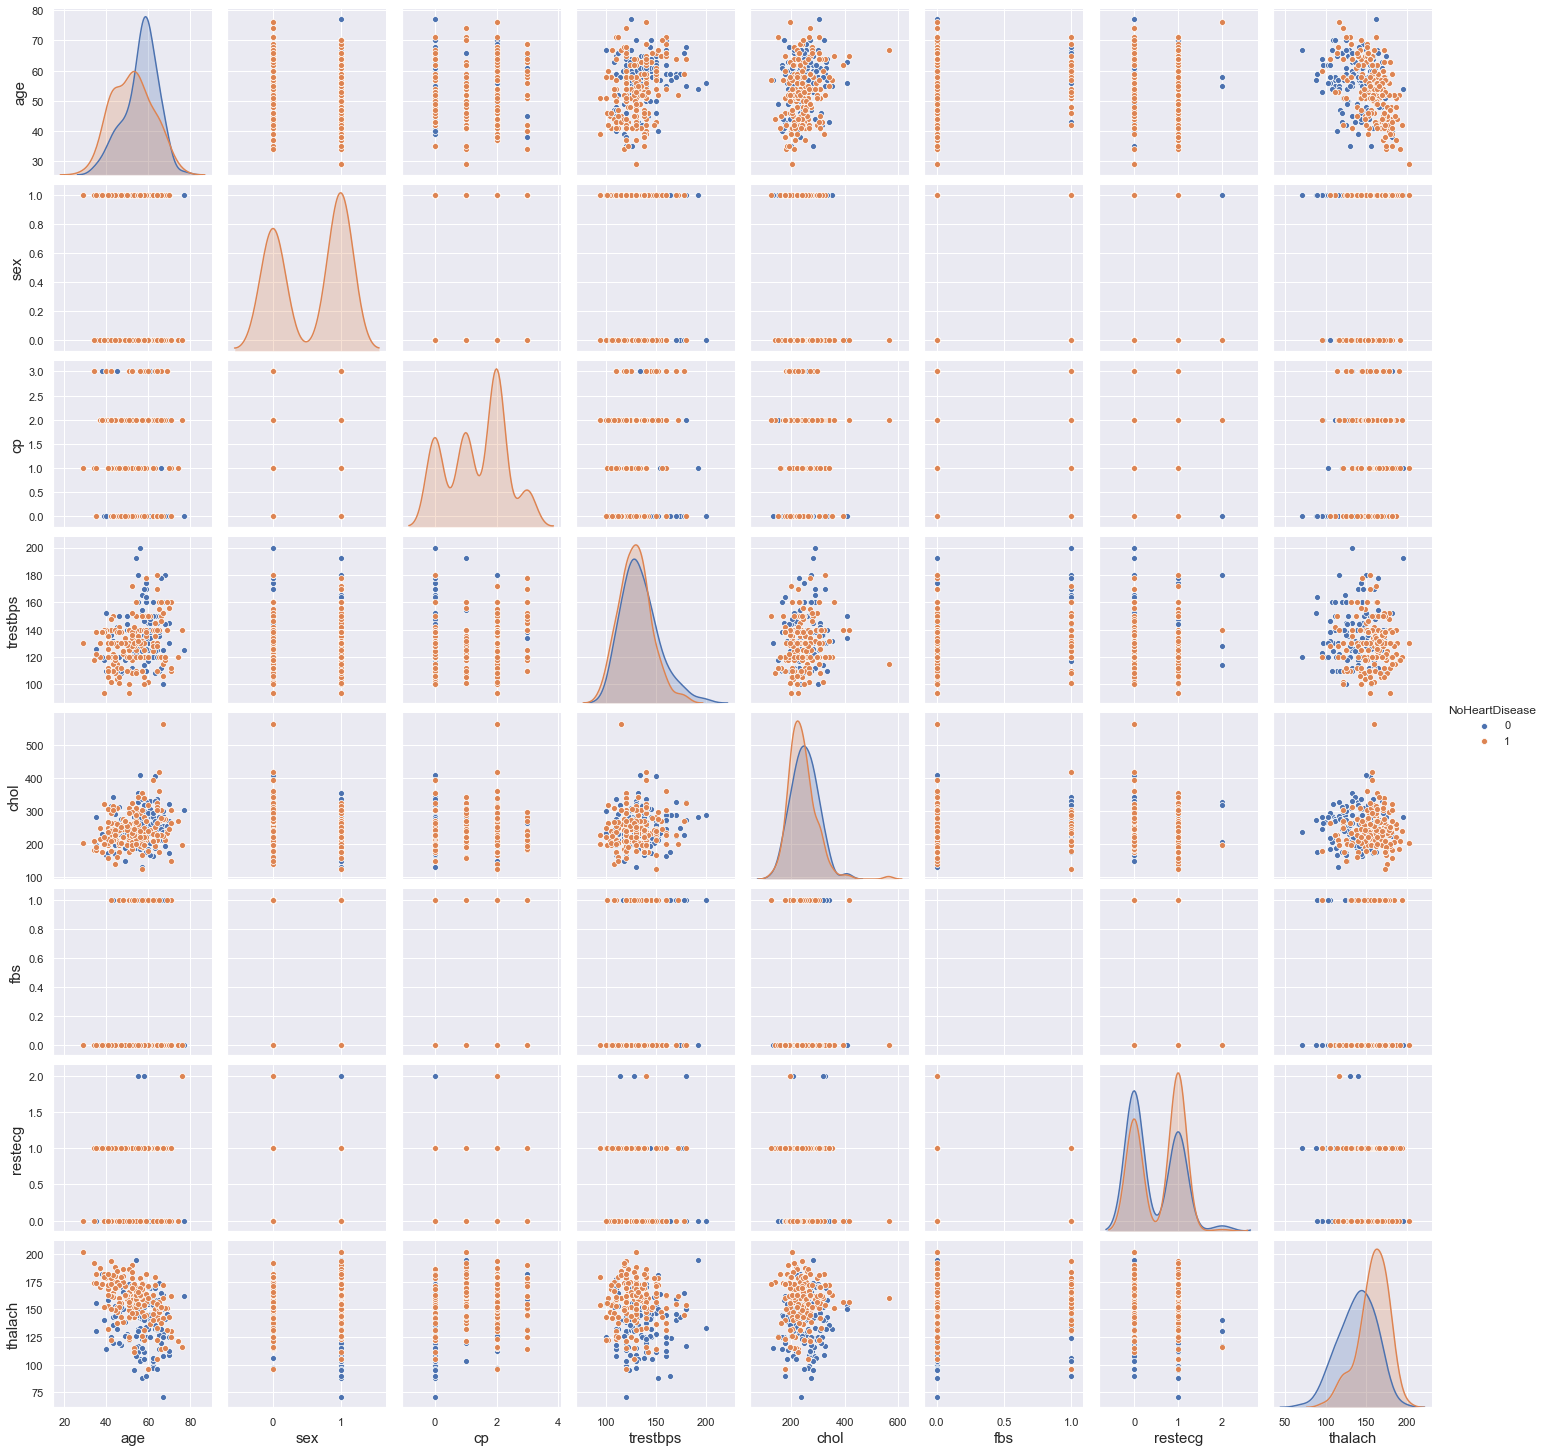

In [31]:
sns.pairplot(data.iloc[:, [0,1,2,3,4,5,6,7,13]], hue='NoHeartDisease')

